In [118]:
#This is a system which predicts the amount of specific item needed given the number of guests.
#Starting with importing the packages required
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

In [119]:
#This is a dataset downloaded from kaggle which is merely some food item records maintained by a restaurant 
data = pd.read_csv('Path to your csv file.csv')
data


,Type of Food,Number of Guests,Event Type,Quantity of Food,Storage Conditions,Purchase History,Seasonality,Preparation Method,Geographical Location,Pricing,Wastage Food Amount
0,Meat,310,Corporate,450,Refrigerated,Regular,All Seasons,Buffet,Urban,Low,25
1,Meat,400,Birthday,500,Room Temperature,Regular,Winter,Buffet,Suburban,High,40
2,Vegetables,302,Birthday,371,Refrigerated,Regular,Summer,Buffet,Suburban,Low,27
3,Meat,491,Birthday,497,Refrigerated,Regular,All Seasons,Finger Food,Rural,High,32
4,Meat,300,Corporate,400,Refrigerated,Regular,Winter,Finger Food,Urban,Moderate,25
...,...,...,...,...,...,...,...,...,...,...,...
1777,Baked Goods,310,Corporate,350,Room Temperature,Regular,Summer,Finger Food,Urban,High,35
1778,Baked Goods,284,Social Gathering,443,Room Temperature,Regular,Winter,Buffet,Rural,Low,32
1779,Fruits,220,Wedding,300,Room Temperature,Regular,All Seasons,Finger Food,Urban,Moderate,15
1780,Fruits,250,Wedding,350,Room Temperature,Regular,All Seasons,Finger Food,Rural,Moderate,20


In [120]:
#In order to work with categorical data such as Type of Food which includes textual-data we need to convert it into suitable form 
#such that the ML understands
data_encoded = pd.get_dummies(data, columns=['Type of Food', 'Event Type','Storage Conditions','Preparation Method','Geographical Location','Pricing'], drop_first=True)
data_encoded                                

,Number of Guests,Quantity of Food,Purchase History,Seasonality,Wastage Food Amount,Type of Food_Dairy Products,Type of Food_Fruits,Type of Food_Meat,Type of Food_Vegetables,Event Type_Corporate,Event Type_Social Gathering,Event Type_Wedding,Storage Conditions_Room Temperature,Preparation Method_Finger Food,Preparation Method_Sit-down Dinner,Geographical Location_Suburban,Geographical Location_Urban,Pricing_Low,Pricing_Moderate
0,310,450,Regular,All Seasons,25,0,0,1,0,1,0,0,0,0,0,0,1,1,0
1,400,500,Regular,Winter,40,0,0,1,0,0,0,0,1,0,0,1,0,0,0
2,302,371,Regular,Summer,27,0,0,0,1,0,0,0,0,0,0,1,0,1,0
3,491,497,Regular,All Seasons,32,0,0,1,0,0,0,0,0,1,0,0,0,0,0
4,300,400,Regular,Winter,25,0,0,1,0,1,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1777,310,350,Regular,Summer,35,0,0,0,0,1,0,0,1,1,0,0,1,0,0
1778,284,443,Regular,Winter,32,0,0,0,0,0,1,0,1,0,0,0,0,1,0
1779,220,300,Regular,All Seasons,15,0,1,0,0,0,0,1,1,1,0,0,1,0,1
1780,250,350,Regular,All Seasons,20,0,1,0,0,0,0,1,1,1,0,0,0,0,1


C:\Users\Siddhi Patil\AppData\Local\Temp\ipykernel_4156\4118820301.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot=sb.heatmap(data_encoded.corr())


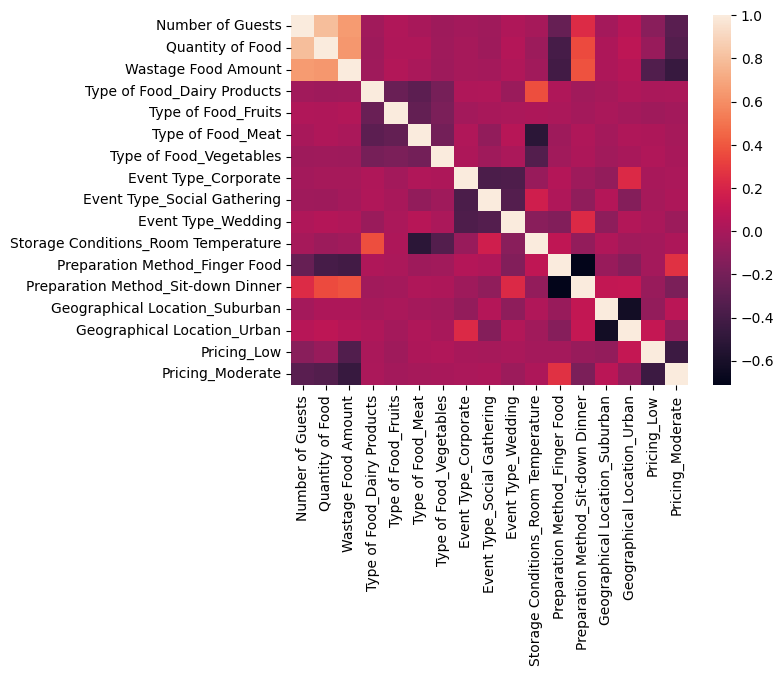

In [121]:
#To select appropriate features we can find the correlation-matrix for each column with others and get a heatmap out of it.
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb

# plotting correlation heatmap
dataplot=sb.heatmap(data_encoded.corr())
  
# displaying heatmap
mp.show()

In [122]:
#Handling null values
data.isnull().values.any()


False

In [123]:
data.shape

(1782, 11)

In [124]:
data['Type of Food'].unique()

array(['Meat', 'Vegetables', 'Fruits', 'Baked Goods', 'Dairy Products'],
      dtype=object)

In [125]:
data['Event Type'].unique()

array(['Corporate', 'Birthday', 'Wedding', 'Social Gathering'],
      dtype=object)

In [126]:
data['Geographical Location'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [133]:
#Using RandomForestClassifier train the model 
data = pd.read_csv('Path to your csv.csv')
unnecessary_columns = ['Storage Conditions','Purchase History','Seasonality','Preparation Method','Pricing']  # List the names of columns to be removed
data = data.drop(columns=unnecessary_columns)
X = data.drop(columns=['Quantity of Food', 'Wastage Food Amount'])
y_quantity = data['Quantity of Food']
y_wastage = data['Wastage Food Amount']

# We use ColumnTransformer to preserve the feature names
categorical_columns = ['Type of Food', 'Event Type', 'Geographical Location']
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder())])
preprocessor = ColumnTransformer(
    transformers=[('cat', categorical_transformer, categorical_columns)],
    remainder='passthrough' 
    # This will keep non-categorical features as they are
)

#Splitting data into test and train
X_train, X_test, y_quantity_train, y_quantity_test, y_wastage_train, y_wastage_test = train_test_split(
    X, y_quantity, y_wastage, test_size=0.2, random_state=42)

#Training and fitting the model for predicting required amount of food
rf_quantity = RandomForestRegressor(n_estimators=100, random_state=42)
model_quantity = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', rf_quantity)])
model_quantity.fit(X_train, y_quantity_train)

#Training and fitting the model for predicting wastage food amount
rf_wastage = RandomForestRegressor(n_estimators=100, random_state=42)
model_wastage = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', rf_wastage)])
model_wastage.fit(X_train, y_wastage_train)


y_quantity_pred = model_quantity.predict(X_test)
y_wastage_pred = model_wastage.predict(X_test)

# Evaluating the models
quantity_mae = mean_absolute_error(y_quantity_test, y_quantity_pred)
quantity_mse = mean_squared_error(y_quantity_test, y_quantity_pred)
quantity_r2 = r2_score(y_quantity_test, y_quantity_pred)

wastage_mae = mean_absolute_error(y_wastage_test, y_wastage_pred)
wastage_mse = mean_squared_error(y_wastage_test, y_wastage_pred)
wastage_r2 = r2_score(y_wastage_test, y_wastage_pred)

print("Quantity of Food - MAE:", quantity_mae)
print("Quantity of Food - MSE:", quantity_mse)
print("Quantity of Food - R-squared:", quantity_r2)

print("Wastage Food Amount - MAE:", wastage_mae)
print("Wastage Food Amount - MSE:", wastage_mse)
print("Wastage Food Amount - R-squared:", wastage_r2)

#The error metrics come into consideration depending upon the objective of our model and the dataset

Quantity of Food - MAE: 14.113938858828876
Quantity of Food - MSE: 870.725772894462
Quantity of Food - R-squared: 0.8014319140779835
Wastage Food Amount - MAE: 4.5758249801898145
Wastage Food Amount - MSE: 44.13398410381283
Wastage Food Amount - R-squared: 0.5742338031020593


In [135]:
#Now that the model is trained to deploy this into a website we first define the above code into a function

def train_food_wastage_model(data_file, target_columns, categorical_columns, unnecessary_columns=None):
    data = pd.read_csv(data_file)
    if unnecessary_columns:
        data = data.drop(columns=unnecessary_columns)

    
    X = data.drop(columns=target_columns)
    y = data[target_columns]
    categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder())])
    preprocessor = ColumnTransformer(
        transformers=[('cat', categorical_transformer, categorical_columns)],
        remainder='passthrough'  # This will keep non-categorical features as they are
    )

    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    rf_model = RandomForestRegressor(n_estimators=, random_state=42)
    model = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', rf_model)])
    model.named_steps['regressor'].target_columns = target_columns  # Store target column names in the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("Model Evaluation:")
    print("MAE:", mae)
    print("MSE:", mse)
    print("R-squared:", r2)

    return model

def food_wastage_prediction(model, input_data):
   
    input_df = pd.DataFrame(input_data, index=[0])
    predictions = model.predict(input_df)
    prediction_dict = {}
    for i, column in enumerate(model.named_steps['regressor'].target_columns):
        prediction_dict[column] = predictions[0][i]

    return prediction_dict

# Example usage:
data_file = 'Path to your csv.csv'
target_columns = ['Quantity of Food', 'Wastage Food Amount']
categorical_columns = ['Type of Food', 'Event Type', 'Geographical Location']
unnecessary_columns = ['Storage Conditions','Purchase History','Seasonality','Preparation Method','Pricing'
]  # List the names of columns to be removed

# Train the model
model = train_food_wastage_model(data_file, target_columns, categorical_columns, unnecessary_columns)

# User input
user_input = {
    'Type of Food': 'Vegetables',
    'Number of Guests': 570,
    'Event Type': 'Wedding',
    'Geographical Location': 'Urban'
}

# Make prediction using user input
predictions = food_wastage_prediction(model, user_input)
print("Predictions:", predictions)


Model Evaluation:
MAE: 9.420415571995207
MSE: 457.3534289993068
R-squared: 0.6808385103561898
Predictions: {'Quantity of Food': 280.18, 'Wastage Food Amount': 20.18}


In [136]:
#Saving the model using pickle to utilize in web-deployement
import pickle

with open('quantity_model12.pkl', 'wb') as f:
    pickle.dump(model_quantity, f)

with open('wastage_model12.pkl', 'wb') as f:
    pickle.dump(model_wastage, f)
